<a href="https://colab.research.google.com/github/Rishabh-Mahapatra17/Customer-Classification/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 5.59


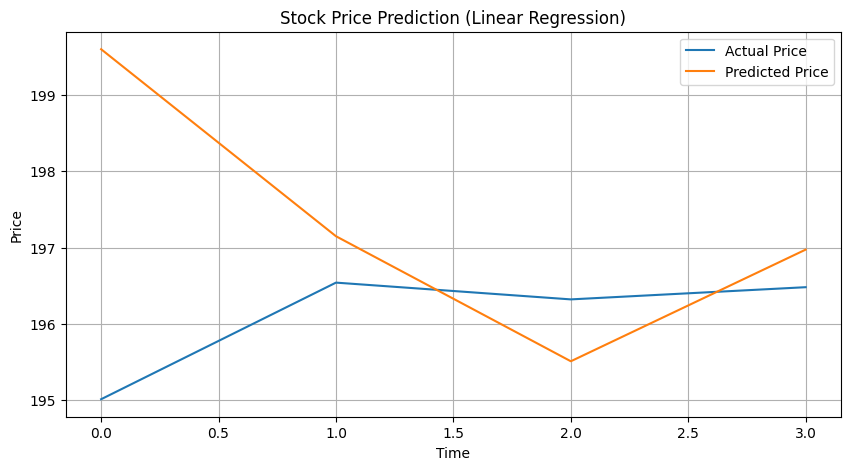

In [ ]:
# stock_predictor_csv.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Load CSV Data
def load_data(path='AAPL.csv'):
    data = pd.read_csv(path, parse_dates=['Date'])
    data = data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
    data = data.dropna()
    return data

# Step 2: Feature Engineering
def add_features(data):
    data['MA10'] = data['Close'].rolling(window=10).mean()
    data['MA50'] = data['Close'].rolling(window=50).mean()
    data['Daily_Return'] = data['Close'].pct_change()
    data['Volatility'] = data['High'] - data['Low']
    data = data.dropna()
    return data

# Step 3: Prepare Features and Labels
def prepare_data(data):
    features = ['Open', 'High', 'Low', 'Volume', 'MA10', 'MA50', 'Volatility']
    X = data[features]
    y = data['Close']
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Model
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Step 5: Evaluate and Plot
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f"Mean Squared Error: {mse:.2f}")

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label='Actual Price')
    plt.plot(predictions, label='Predicted Price')
    plt.title('Stock Price Prediction (Linear Regression)')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

#  Run Everything
def run_pipeline():
    data = load_data()
    data = add_features(data)
    X_train, X_test, y_train, y_test = prepare_data(data)
    model = train_model(X_train, y_train)
    evaluate_model(model, X_test, y_test)

if __name__ == "__main__":
    run_pipeline()
